In [1]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
import glob
import os
import numpy as np
import sys
sys.path.append( '../src/')
from matplotlib import pyplot as plt
from compile_treeset import compile_folder , compare_treesets


In [2]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff


def graph_treedf(tree_resdf , rescols, rescols_norm , outfolder = '../figures/' , prefix = '' ):
    #sns.violinplot(tree_resdf[rescols] , hue=tree_resdf.filtered, split=True , cut =0 , bw=.15)
    if os.path.exists(outfolder ) == False:
        os.mkdir(outfolder)
    
    
    sns.set(rc={'figure.figsize':(10,8)})
    graph = sns.violinplot(tree_resdf[rescols] , cut = 0 , inner= 'box' )
    graph.axhline(max([tree_resdf[col].median() for col in rescols ]) , dashes = [2 , 1 ] )
    plt.xticks(rotation=45)
    
    
    plt.show()
    plt.savefig( outfolder + prefix + '_score.svg')

    sns.set(rc={'figure.figsize':(10,8)})
    graph = sns.violinplot(tree_resdf[rescols_norm] , cut = 0    )
    graph.axhline(max([tree_resdf[col].median() for col in rescols_norm ]) , dashes = [2 , 1 ] )
    plt.xticks(rotation=45)
    plt.show()
    
    
    plt.savefig( outfolder + prefix + '_norm_score.svg')
    
    clean = tree_resdf[rescols].dropna()
    fig = ff.create_distplot([ clean[col] for col in rescols ], [col for col in rescols] , bin_size = 150, show_rug = True)
    fig.show()
    

In [3]:
def compile_results(cladefolders , plotall = False, scorefunc = 'root_score'):
    rescols = ['lddt_1_raw_struct_tree' , 'fident_1_raw_struct_tree', 'alntmscore_1_raw_struct_tree', 'sequences' ]
    rescols_norm = ['lddt_1_raw_struct_tree'+'_norm' , 'fident_1_raw_struct_tree'+'_norm', 'alntmscore_1_raw_struct_tree'+'_norm' , 'sequences'+'_norm']
    dfs = []
    plotall = False
    for folder in cladefolders:
        #try:
        if 'logs' not in folder:
            print(folder)
            res = compile_folder(folder, scorefunc = scorefunc, verbose = False)
            if res :
                tree_resdf , refcols = res
                compare_treesets(tree_resdf  , colfilter= 'sequence' , display_lineplot = False , verbose = True)
                tree_resdf['folder'] = folder

                #add filtered bool column
                tree_resdf['filtered'] = tree_resdf['folder'].apply(lambda x : 'unfiltered' in x)

                if 'OMA' in folder:
                    dfs.append(tree_resdf)
                    if plotall == True:
                        graph_treedf(tree_resdf , rescols, rescols_norm)
                else:
                    graph_treedf(tree_resdf , rescols, rescols_norm)

    total_df = pd.concat(dfs)
    try:
        graph_treedf(total_df[total_df.filtered == False] , rescols, rescols_norm , prefix = 'OMA' )
        graph_treedf(total_df[total_df.filtered == True] , rescols, rescols_norm , prefix = 'OMA' )
    except:
        print('graphing err' )
    return total_df

../CAT_data/
../CAT_data/
1465


processed: 1464:   6%|▌         | 91/1465 [00:00<00:03, 431.54it/s]
/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3351: UserWarning:

Sample size too small for normal approximation.



lddt_1_raw_struct_tree sequences
delta: 2989 delta norm: 0.07389564662677472 WilcoxonResult(statistic=16.0, pvalue=0.779434528427275)
fident_1_raw_struct_tree sequences
delta: -187 delta norm: -0.13883335616842954 WilcoxonResult(statistic=3.0, pvalue=1.0)
alntmscore_1_raw_struct_tree sequences
delta: -1188 delta norm: -0.46362245415674885 WilcoxonResult(statistic=0.0, pvalue=0.17971249487899976)
lddt_0_raw_struct_tree sequences
delta: -525 delta norm: -0.07433551969500564 WilcoxonResult(statistic=1.0, pvalue=0.14412703481601533)
fident_0_raw_struct_tree sequences
delta: 2751 delta norm: 0.6090184304554299 WilcoxonResult(statistic=0.0, pvalue=0.17971249487899976)
alntmscore_0_raw_struct_tree sequences
delta: -494 delta norm: -0.08676070159836673 WilcoxonResult(statistic=0.0, pvalue=0.17971249487899976)


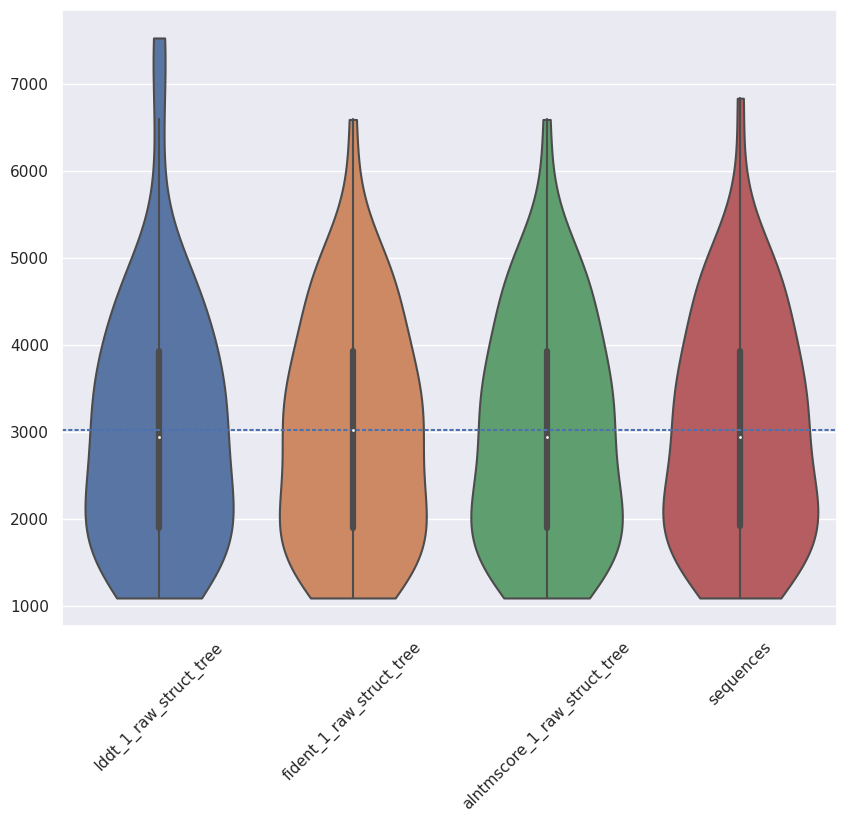

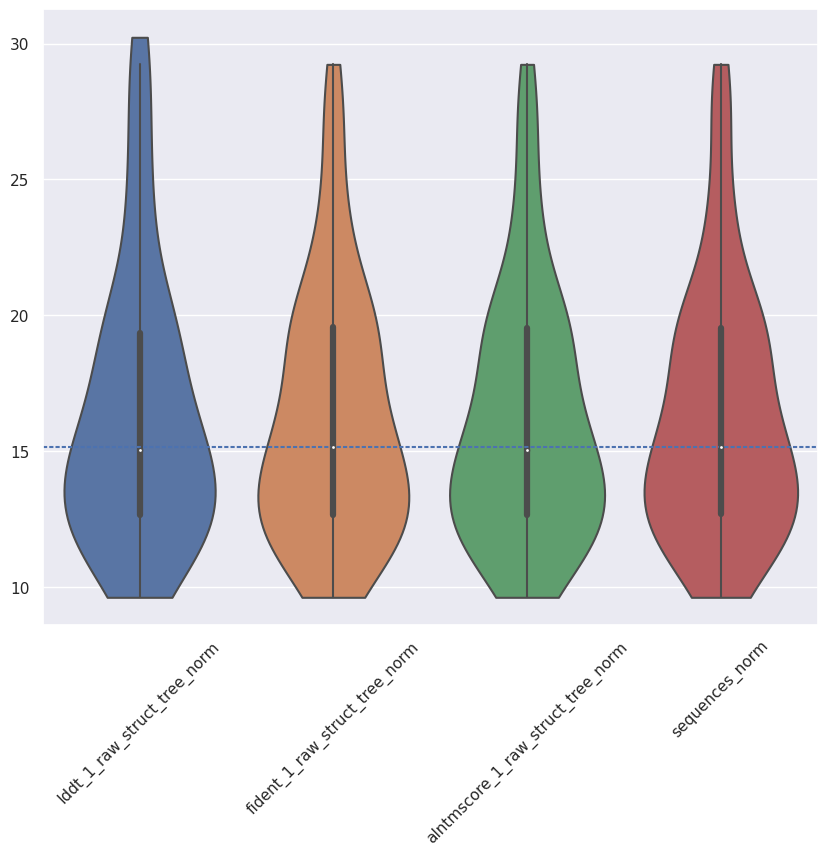

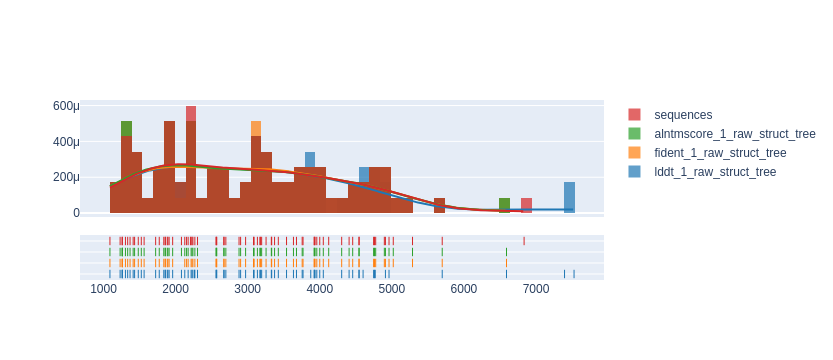

ValueError: No objects to concatenate

<Figure size 1000x800 with 0 Axes>

In [38]:
cladefolders = [ '../CAT_data/']# , '../SCOP_data/' ]
scorefunc = 'root_score'
catdf = compile_results(cladefolders, scorefunc = 'root_score'  )

cladefolders = [ '../CATH_data/']
cathdf = compile_results(cladefolders, scorefunc = 'root_score'  )



../OMA_data_unfiltered/OMA_data/Fungi/
../OMA_data_unfiltered/OMA_data/Fungi/
117


processed: 117:  99%|█████████▉| 116/117 [00:20<00:00,  5.77it/s]


lddt_1_raw_struct_tree sequences
delta: -34 delta norm: -0.30328732012579984 WilcoxonResult(statistic=2981.5, pvalue=0.9614173592637228)
fident_1_raw_struct_tree sequences
delta: 744 delta norm: 1.5383880553129279 WilcoxonResult(statistic=2130.5, pvalue=0.03711109815183911)
alntmscore_1_raw_struct_tree sequences
delta: -2899 delta norm: -5.5636370029653035 WilcoxonResult(statistic=1362.5, pvalue=1.6930213811452726e-07)
lddt_0_raw_struct_tree sequences
delta: -277 delta norm: -0.5651351039960507 WilcoxonResult(statistic=2760.5, pvalue=0.38380054501105854)
fident_0_raw_struct_tree sequences
delta: -843.0 delta norm: -1.6809561865439828 WilcoxonResult(statistic=2273.5, pvalue=0.055736276610136526)
alntmscore_0_raw_struct_tree sequences
delta: -2937 delta norm: -5.4107472698353485 WilcoxonResult(statistic=1418.0, pvalue=3.9970436803548785e-07)
../OMA_data_unfiltered/OMA_data/Bilateria/
../OMA_data_unfiltered/OMA_data/Bilateria/
117


processed: 117: 100%|██████████| 117/117 [00:21<00:00,  5.43it/s]


lddt_1_raw_struct_tree sequences
delta: -16914.0 delta norm: -7.4451659389245926 WilcoxonResult(statistic=1190.0, pvalue=1.287945101763005e-07)
fident_1_raw_struct_tree sequences
delta: 3321.0 delta norm: 1.7031282180262846 WilcoxonResult(statistic=1805.5, pvalue=0.019446777723930206)
alntmscore_1_raw_struct_tree sequences
delta: -42649.0 delta norm: -20.117885801727052 WilcoxonResult(statistic=198.0, pvalue=7.257606804895086e-18)
lddt_0_raw_struct_tree sequences
delta: -18465.0 delta norm: -8.19208913472624 WilcoxonResult(statistic=1147.5, pvalue=6.209500166124212e-08)
fident_0_raw_struct_tree sequences
delta: -22959.0 delta norm: -10.09617387803853 WilcoxonResult(statistic=621.0, pvalue=1.802246982580969e-12)
alntmscore_0_raw_struct_tree sequences
delta: -46912.0 delta norm: -21.356451204072066 WilcoxonResult(statistic=250.0, pvalue=2.679011575221926e-17)
../OMA_data_unfiltered/OMA_data/Eukaryota/
../OMA_data_unfiltered/OMA_data/Eukaryota/
117


processed: 117:  97%|█████████▋| 114/117 [00:20<00:00,  5.53it/s]


lddt_1_raw_struct_tree sequences
delta: -43935.0 delta norm: -11.433157946075623 WilcoxonResult(statistic=446.0, pvalue=5.432626807944453e-13)
fident_1_raw_struct_tree sequences
delta: -1793.0 delta norm: 0.25802107593079476 WilcoxonResult(statistic=2510.0, pvalue=0.8243974981801055)
alntmscore_1_raw_struct_tree sequences
delta: -92448.0 delta norm: -25.861972275759797 WilcoxonResult(statistic=16.0, pvalue=2.9248376236004305e-18)
lddt_0_raw_struct_tree sequences
delta: -44017.0 delta norm: -11.275716714375143 WilcoxonResult(statistic=485.5, pvalue=3.812354832995053e-12)
fident_0_raw_struct_tree sequences
delta: -47432.0 delta norm: -13.044298434636367 WilcoxonResult(statistic=379.0, pvalue=6.257159451987723e-14)
alntmscore_0_raw_struct_tree sequences
delta: -93412.0 delta norm: -26.09218985158437 WilcoxonResult(statistic=24.5, pvalue=3.7557280153416546e-18)
../OMA_data/Bacteria/
../OMA_data/Bacteria/
633


processed: 633:  99%|█████████▉| 626/633 [01:23<00:00,  7.49it/s]


lddt_1_raw_struct_tree sequences
error lddt_1_raw_struct_tree sequences
fident_1_raw_struct_tree sequences
error fident_1_raw_struct_tree sequences
alntmscore_1_raw_struct_tree sequences
error alntmscore_1_raw_struct_tree sequences
lddt_0_raw_struct_tree sequences
error lddt_0_raw_struct_tree sequences
fident_0_raw_struct_tree sequences
error fident_0_raw_struct_tree sequences
alntmscore_0_raw_struct_tree sequences
error alntmscore_0_raw_struct_tree sequences
../OMA_data/Euteleostomi/
../OMA_data/Euteleostomi/
1019


processed: 1019:  38%|███▊      | 391/1019 [00:40<01:05,  9.56it/s]


lddt_1_raw_struct_tree sequences
delta: -13487 delta norm: -11.593233088210964 WilcoxonResult(statistic=8206.0, pvalue=1.2413434623871142e-13)
fident_1_raw_struct_tree sequences
delta: 4755 delta norm: 2.5264020961567493 WilcoxonResult(statistic=5694.5, pvalue=0.0262056647921037)
alntmscore_1_raw_struct_tree sequences
delta: -31450 delta norm: -26.85653496686643 WilcoxonResult(statistic=4847.0, pvalue=1.9156077419393582e-31)
lddt_0_raw_struct_tree sequences
delta: -16410.0 delta norm: -15.234314851320503 WilcoxonResult(statistic=8688.0, pvalue=3.3986036257094675e-16)
fident_0_raw_struct_tree sequences
delta: -21838 delta norm: -18.423224707727954 WilcoxonResult(statistic=7068.5, pvalue=2.0029925258815643e-21)
alntmscore_0_raw_struct_tree sequences
delta: -32372.0 delta norm: -27.86201532668192 WilcoxonResult(statistic=4378.0, pvalue=6.42474879523401e-34)
../OMA_data/Tetrapoda/
../OMA_data/Tetrapoda/
359


processed: 359:  46%|████▌     | 166/359 [00:15<00:18, 10.38it/s]


lddt_1_raw_struct_tree sequences
delta: 134831 delta norm: -3.44224914482764 WilcoxonResult(statistic=1986.0, pvalue=0.0050063076205347275)
fident_1_raw_struct_tree sequences
delta: 8470 delta norm: 2.1168444205567987 WilcoxonResult(statistic=651.0, pvalue=0.0014230990677708056)
alntmscore_1_raw_struct_tree sequences
delta: -17318 delta norm: -8.316204467322578 WilcoxonResult(statistic=1311.0, pvalue=2.695186440536601e-10)
lddt_0_raw_struct_tree sequences
delta: 146022 delta norm: -3.5545627335265246 WilcoxonResult(statistic=2395.5, pvalue=0.008740597176846476)
fident_0_raw_struct_tree sequences
delta: 66154 delta norm: -5.443649603350801 WilcoxonResult(statistic=1961.5, pvalue=0.00030981713601955347)
alntmscore_0_raw_struct_tree sequences
delta: -29969 delta norm: -9.057053340946085 WilcoxonResult(statistic=1111.5, pvalue=9.174409877961973e-12)
../OMA_data_unfiltered/OMA_data/Chordata/
../OMA_data_unfiltered/OMA_data/Chordata/
117


processed: 117:  96%|█████████▌| 112/117 [00:20<00:00,  5.48it/s]


lddt_1_raw_struct_tree sequences
delta: 7048.0 delta norm: -6.861479842790893 WilcoxonResult(statistic=882.5, pvalue=2.1330724335529866e-07)
fident_1_raw_struct_tree sequences
delta: 69546.0 delta norm: 2.4760110113064013 WilcoxonResult(statistic=1058.0, pvalue=0.0018704421633782933)
alntmscore_1_raw_struct_tree sequences
delta: 9085.0 delta norm: -13.86835557241969 WilcoxonResult(statistic=713.0, pvalue=1.2919895699058052e-09)
lddt_0_raw_struct_tree sequences
delta: 15836.0 delta norm: -8.363388869758491 WilcoxonResult(statistic=908.0, pvalue=2.1126902155587348e-07)
fident_0_raw_struct_tree sequences
delta: 13078.0 delta norm: -7.22329539614873 WilcoxonResult(statistic=810.5, pvalue=2.931774320641525e-08)
alntmscore_0_raw_struct_tree sequences
delta: 5947.0 delta norm: -15.113002851438564 WilcoxonResult(statistic=406.0, pvalue=8.289804471321492e-13)
../OMA_data/Fungi/
../OMA_data/Fungi/
138


processed: 137:  45%|████▍     | 62/138 [00:08<00:10,  7.48it/s]
/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



lddt_1_raw_struct_tree sequences
delta: -271 delta norm: -0.3163941347918946 WilcoxonResult(statistic=116.5, pvalue=0.2155920713281324)
fident_1_raw_struct_tree sequences
delta: 51 delta norm: 0.22600107591077853 WilcoxonResult(statistic=89.5, pvalue=0.8247291910384491)
alntmscore_1_raw_struct_tree sequences
delta: -394 delta norm: -0.7198446081237635 WilcoxonResult(statistic=93.5, pvalue=0.17573206333421632)
lddt_0_raw_struct_tree sequences
delta: -295 delta norm: -0.6347461939146919 WilcoxonResult(statistic=78.5, pvalue=0.040984036134347444)
fident_0_raw_struct_tree sequences
delta: -216.0 delta norm: -0.26783439424112276 WilcoxonResult(statistic=117.0, pvalue=0.5226240851263899)
alntmscore_0_raw_struct_tree sequences
delta: -589.0 delta norm: -1.2867687291189842 WilcoxonResult(statistic=87.5, pvalue=0.02527997785779689)
../OMA_data/Eumetazoa/
../OMA_data/Eumetazoa/
896


processed: 896:  65%|██████▍   | 582/896 [01:00<00:32,  9.59it/s]


lddt_1_raw_struct_tree sequences
delta: -46742.0 delta norm: -28.897642231035192 WilcoxonResult(statistic=20856.5, pvalue=1.3121209865548058e-28)
fident_1_raw_struct_tree sequences
delta: 12028.0 delta norm: 7.17855917569672 WilcoxonResult(statistic=26044.0, pvalue=8.54268776013579e-08)
alntmscore_1_raw_struct_tree sequences
delta: -113156.0 delta norm: -67.4334504105129 WilcoxonResult(statistic=9856.5, pvalue=2.7538257840573352e-58)
lddt_0_raw_struct_tree sequences
delta: -51449.0 delta norm: -30.07971799294134 WilcoxonResult(statistic=21754.0, pvalue=4.409824938426223e-27)
fident_0_raw_struct_tree sequences
delta: -63679.0 delta norm: -37.38903014373353 WilcoxonResult(statistic=17460.5, pvalue=2.6055906663038295e-36)
alntmscore_0_raw_struct_tree sequences
delta: -123708.0 delta norm: -72.35786042384424 WilcoxonResult(statistic=9171.0, pvalue=1.2798216629404165e-59)
../OMA_data_unfiltered/OMA_data/Tetrapoda/
../OMA_data_unfiltered/OMA_data/Tetrapoda/
117


processed: 117:  99%|█████████▉| 116/117 [00:10<00:00, 11.01it/s]


lddt_1_raw_struct_tree sequences
delta: -1213 delta norm: -4.368010282975619 WilcoxonResult(statistic=2401.0, pvalue=0.009144524613373485)
fident_1_raw_struct_tree sequences
delta: 9392 delta norm: 2.222875250279856 WilcoxonResult(statistic=1519.0, pvalue=0.0020298462014480723)
alntmscore_1_raw_struct_tree sequences
delta: -12289 delta norm: -11.23024285229335 WilcoxonResult(statistic=1034.5, pvalue=8.164342154389388e-11)
lddt_0_raw_struct_tree sequences
delta: 9408 delta norm: -5.807438850646577 WilcoxonResult(statistic=2229.5, pvalue=0.0020339223536602505)
fident_0_raw_struct_tree sequences
delta: -5830 delta norm: -6.884349694430511 WilcoxonResult(statistic=1653.5, pvalue=2.695711850449567e-06)
alntmscore_0_raw_struct_tree sequences
delta: -33917 delta norm: -11.483930520741753 WilcoxonResult(statistic=709.0, pvalue=1.422370165418789e-13)
../OMA_data_unfiltered/OMA_data/Bacteria/
../OMA_data_unfiltered/OMA_data/Bacteria/
117


processed: 117: 100%|██████████| 117/117 [00:17<00:00,  6.83it/s]


lddt_1_raw_struct_tree sequences
delta: 1500.0 delta norm: 2.3421623578494373 WilcoxonResult(statistic=2051.5, pvalue=0.001237069669445679)
fident_1_raw_struct_tree sequences
delta: 1932.0 delta norm: 1.7970015229765732 WilcoxonResult(statistic=2047.0, pvalue=0.026739643997141474)
alntmscore_1_raw_struct_tree sequences
delta: 1227.0 delta norm: 1.1111068200584162 WilcoxonResult(statistic=2559.0, pvalue=0.10620718392735293)
lddt_0_raw_struct_tree sequences
delta: 2401.0 delta norm: 2.7888568817320785 WilcoxonResult(statistic=1923.0, pvalue=0.0004886113964171408)
fident_0_raw_struct_tree sequences
delta: 710.0 delta norm: 0.7872874286063334 WilcoxonResult(statistic=2748.5, pvalue=0.22766495382667462)
alntmscore_0_raw_struct_tree sequences
delta: 35.0 delta norm: 0.31718225162261804 WilcoxonResult(statistic=2873.0, pvalue=0.3194341868586058)
../OMA_data/Opisthokonta/
../OMA_data/Opisthokonta/
523


processed: 523:  66%|██████▋   | 347/523 [01:07<00:34,  5.15it/s]


lddt_1_raw_struct_tree sequences
delta: -36311 delta norm: -18.66951032911289 WilcoxonResult(statistic=5981.0, pvalue=1.1407474690414097e-20)
fident_1_raw_struct_tree sequences
delta: 3205 delta norm: -0.15969697319574722 WilcoxonResult(statistic=13255.5, pvalue=0.8885389038038034)
alntmscore_1_raw_struct_tree sequences
delta: -82301.0 delta norm: -43.97409445847222 WilcoxonResult(statistic=2731.0, pvalue=5.294859448578532e-36)
lddt_0_raw_struct_tree sequences
delta: -36248 delta norm: -19.079606847305136 WilcoxonResult(statistic=6207.5, pvalue=1.02836077915717e-19)
fident_0_raw_struct_tree sequences
delta: -43918 delta norm: -22.57416347268029 WilcoxonResult(statistic=6664.5, pvalue=8.296751186605907e-20)
alntmscore_0_raw_struct_tree sequences
delta: -84474.0 delta norm: -46.130486482893026 WilcoxonResult(statistic=2440.0, pvalue=2.2354262144791542e-37)
../OMA_data_unfiltered/OMA_data/Eumetazoa/
../OMA_data_unfiltered/OMA_data/Eumetazoa/
117


processed: 117: 100%|██████████| 117/117 [00:17<00:00,  6.59it/s]


lddt_1_raw_struct_tree sequences
delta: -16657.0 delta norm: -6.955848609001461 WilcoxonResult(statistic=823.5, pvalue=1.0765279258607953e-07)
fident_1_raw_struct_tree sequences
delta: 2004.0 delta norm: 1.5095536463267514 WilcoxonResult(statistic=1240.5, pvalue=0.0011655090824693624)
alntmscore_1_raw_struct_tree sequences
delta: -41653.0 delta norm: -18.861448065974383 WilcoxonResult(statistic=109.5, pvalue=3.4281505195666507e-16)
lddt_0_raw_struct_tree sequences
delta: -19832.0 delta norm: -6.789867622834685 WilcoxonResult(statistic=1044.5, pvalue=4.516940686040737e-06)
fident_0_raw_struct_tree sequences
delta: -19301.0 delta norm: -8.8290091846038 WilcoxonResult(statistic=733.0, pvalue=9.340139638067063e-09)
alntmscore_0_raw_struct_tree sequences
delta: -60354.0 delta norm: -19.05576854445089 WilcoxonResult(statistic=26.5, pvalue=2.7696401012002027e-17)
../OMA_data_unfiltered/OMA_data/Opisthokonta/
../OMA_data_unfiltered/OMA_data/Opisthokonta/
117


processed: 117:  97%|█████████▋| 113/117 [00:13<00:00,  8.38it/s]


lddt_1_raw_struct_tree sequences
delta: -31018 delta norm: -9.917681911577349 WilcoxonResult(statistic=909.0, pvalue=9.793827706017283e-11)
fident_1_raw_struct_tree sequences
delta: 6543 delta norm: 1.5429706249424902 WilcoxonResult(statistic=2454.5, pvalue=0.17686574331570526)
alntmscore_1_raw_struct_tree sequences
delta: -77026 delta norm: -27.11841689805041 WilcoxonResult(statistic=35.0, pvalue=1.0475645249951046e-19)
lddt_0_raw_struct_tree sequences
delta: -36208 delta norm: -12.05488930509471 WilcoxonResult(statistic=553.5, pvalue=9.136384619943909e-14)
fident_0_raw_struct_tree sequences
delta: -38703 delta norm: -13.439348913024649 WilcoxonResult(statistic=550.5, pvalue=5.276434187119992e-14)
alntmscore_0_raw_struct_tree sequences
delta: -78505 delta norm: -27.45280782670828 WilcoxonResult(statistic=42.0, pvalue=1.8633304438286894e-19)
../OMA_data/Eukaryota/
../OMA_data/Eukaryota/
605


processed: 603:  76%|███████▋  | 462/605 [01:19<00:24,  5.81it/s]


lddt_1_raw_struct_tree sequences
delta: -95554.0 delta norm: -26.35165563005799 WilcoxonResult(statistic=12121.5, pvalue=3.147443784898319e-26)
fident_1_raw_struct_tree sequences
delta: 32478.0 delta norm: 4.396033600660477 WilcoxonResult(statistic=21749.5, pvalue=0.0013526467213190504)
alntmscore_1_raw_struct_tree sequences
delta: -182818.0 delta norm: -63.97857764774495 WilcoxonResult(statistic=3238.5, pvalue=1.1983661465630097e-55)
lddt_0_raw_struct_tree sequences
delta: -97979.0 delta norm: -28.100818988020606 WilcoxonResult(statistic=11072.0, pvalue=5.273429866763952e-30)
fident_0_raw_struct_tree sequences
delta: -117793.0 delta norm: -33.29111546799464 WilcoxonResult(statistic=10632.0, pvalue=7.5022025880984055e-31)
alntmscore_0_raw_struct_tree sequences
delta: -197515.0 delta norm: -68.75434275628689 WilcoxonResult(statistic=3068.0, pvalue=2.7538619011026345e-57)
../OMA_data_unfiltered/OMA_data/Euteleostomi/
../OMA_data_unfiltered/OMA_data/Euteleostomi/
117


processed: 117:  97%|█████████▋| 113/117 [00:10<00:00, 10.67it/s]


lddt_1_raw_struct_tree sequences
delta: -13501.0 delta norm: -7.743054399235981 WilcoxonResult(statistic=451.0, pvalue=8.08543674780132e-11)
fident_1_raw_struct_tree sequences
delta: 1445.0 delta norm: 0.232301038367618 WilcoxonResult(statistic=1076.0, pvalue=0.24704563761479492)
alntmscore_1_raw_struct_tree sequences
delta: -27380.0 delta norm: -13.875283164009982 WilcoxonResult(statistic=91.5, pvalue=6.822342319365792e-16)
lddt_0_raw_struct_tree sequences
delta: -15140.0 delta norm: -8.031199144769387 WilcoxonResult(statistic=609.0, pvalue=2.557143151778441e-09)
fident_0_raw_struct_tree sequences
delta: -14161.0 delta norm: -9.1872821917486 WilcoxonResult(statistic=306.0, pvalue=5.949041733148838e-13)
alntmscore_0_raw_struct_tree sequences
delta: -18165.0 delta norm: -13.178925808438297 WilcoxonResult(statistic=152.0, pvalue=4.3123541316039964e-15)
../OMA_data_unfiltered/OMA_data/Dikarya/
../OMA_data_unfiltered/OMA_data/Dikarya/
117


processed: 117:  99%|█████████▉| 116/117 [00:20<00:00,  5.67it/s]


lddt_1_raw_struct_tree sequences
delta: 578.0 delta norm: -0.6114052225808634 WilcoxonResult(statistic=2158.0, pvalue=0.650636278650901)
fident_1_raw_struct_tree sequences
delta: 1932.0 delta norm: 1.9761948214530818 WilcoxonResult(statistic=829.5, pvalue=0.0002444418067015721)
alntmscore_1_raw_struct_tree sequences
delta: -2105.0 delta norm: -4.295735278851441 WilcoxonResult(statistic=1202.5, pvalue=1.996192869319086e-06)
lddt_0_raw_struct_tree sequences
delta: 833.0 delta norm: -0.2692313035601859 WilcoxonResult(statistic=2227.0, pvalue=0.7120424919739292)
fident_0_raw_struct_tree sequences
delta: 474.0 delta norm: -0.4702114056292258 WilcoxonResult(statistic=2217.5, pvalue=0.6863444312900315)
alntmscore_0_raw_struct_tree sequences
delta: -1954.0 delta norm: -4.118633921343811 WilcoxonResult(statistic=1464.5, pvalue=4.060780343843542e-05)
../OMA_data/Dikarya/
../OMA_data/Dikarya/
186


processed: 185:  52%|█████▏    | 96/186 [00:14<00:13,  6.63it/s]


lddt_1_raw_struct_tree sequences
delta: 118.0 delta norm: 0.29594896041210017 WilcoxonResult(statistic=458.5, pvalue=0.6700641553948237)
fident_1_raw_struct_tree sequences
delta: 171.0 delta norm: 0.38700847296202556 WilcoxonResult(statistic=130.0, pvalue=0.15617973895268164)
alntmscore_1_raw_struct_tree sequences
delta: -577.0 delta norm: -1.724560422437361 WilcoxonResult(statistic=396.0, pvalue=0.0076129719546536865)
lddt_0_raw_struct_tree sequences
delta: 252.0 delta norm: 0.5392985585344403 WilcoxonResult(statistic=423.5, pvalue=0.28846890989865814)
fident_0_raw_struct_tree sequences
delta: -256.0 delta norm: -0.7778889970820665 WilcoxonResult(statistic=446.0, pvalue=0.4195319563611576)
alntmscore_0_raw_struct_tree sequences
delta: -425.0 delta norm: -0.9191503077134389 WilcoxonResult(statistic=495.5, pvalue=0.11632593513092017)
../OMA_data_unfiltered/OMA_data/LUCA/
../OMA_data_unfiltered/OMA_data/LUCA/
117


processed: 117: 100%|██████████| 117/117 [00:10<00:00, 10.98it/s]


lddt_1_raw_struct_tree sequences
delta: -19761 delta norm: -4.301237281639802 WilcoxonResult(statistic=2000.5, pvalue=0.00019575046482927608)
fident_1_raw_struct_tree sequences
delta: -406 delta norm: 0.08142044302949192 WilcoxonResult(statistic=3169.5, pvalue=0.8838329630638897)
alntmscore_1_raw_struct_tree sequences
delta: -60333 delta norm: -19.30181177904937 WilcoxonResult(statistic=438.5, pvalue=6.291737552449132e-16)
lddt_0_raw_struct_tree sequences
delta: -19822 delta norm: -4.396872423194096 WilcoxonResult(statistic=1782.0, pvalue=9.069759205358243e-06)
fident_0_raw_struct_tree sequences
delta: -19463 delta norm: -5.28420857572511 WilcoxonResult(statistic=1770.5, pvalue=4.827632199264211e-06)
alntmscore_0_raw_struct_tree sequences
delta: -60386 delta norm: -18.82296738793693 WilcoxonResult(statistic=545.0, pvalue=4.2921820437023994e-15)
../OMA_data/Bilateria/
../OMA_data/Bilateria/
558


processed: 558:  45%|████▌     | 252/558 [00:25<00:30,  9.95it/s]
/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3351: UserWarning:

Sample size too small for normal approximation.



lddt_1_raw_struct_tree sequences
delta: 6 delta norm: 0.07317073170731707 WilcoxonResult(statistic=0.0, pvalue=0.31731050786291415)
fident_1_raw_struct_tree sequences
delta: 6.0 delta norm: 0.07317073170731707 WilcoxonResult(statistic=0.0, pvalue=0.31731050786291415)
alntmscore_1_raw_struct_tree sequences
delta: 6 delta norm: 0.07317073170731707 WilcoxonResult(statistic=0.0, pvalue=0.31731050786291415)
lddt_0_raw_struct_tree sequences
delta: 6 delta norm: 0.07317073170731707 WilcoxonResult(statistic=0.0, pvalue=0.31731050786291415)
fident_0_raw_struct_tree sequences
delta: 6.0 delta norm: 0.07317073170731707 WilcoxonResult(statistic=0.0, pvalue=0.31731050786291415)
alntmscore_0_raw_struct_tree sequences
delta: 6 delta norm: 0.07317073170731707 WilcoxonResult(statistic=0.0, pvalue=0.31731050786291415)
../OMA_data/LUCA/
../OMA_data/LUCA/
880


processed: 880:  97%|█████████▋| 853/880 [01:28<00:02,  9.66it/s]


lddt_1_raw_struct_tree sequences
delta: -63373.0 delta norm: -17.952948267745334 WilcoxonResult(statistic=58812.5, pvalue=4.8563979646243223e-11)
fident_1_raw_struct_tree sequences
delta: 3745.0 delta norm: 6.209355528180456 WilcoxonResult(statistic=62396.0, pvalue=7.321815422952476e-05)
alntmscore_1_raw_struct_tree sequences
delta: -141026.0 delta norm: -64.6744278585306 WilcoxonResult(statistic=22002.5, pvalue=1.0496753105713661e-57)
lddt_0_raw_struct_tree sequences
delta: -61945.0 delta norm: -19.631107964761934 WilcoxonResult(statistic=55419.0, pvalue=8.80989359204067e-14)
fident_0_raw_struct_tree sequences
delta: -71148.0 delta norm: -23.16214320559643 WilcoxonResult(statistic=48752.5, pvalue=1.0504028809701056e-19)
alntmscore_0_raw_struct_tree sequences
delta: -137254.0 delta norm: -63.48780656738712 WilcoxonResult(statistic=23806.0, pvalue=8.96599355648789e-55)
../OMA_data/Chordata/
../OMA_data/Chordata/
786


processed: 786:  50%|█████     | 393/786 [00:18<00:18, 20.77it/s]


lddt_1_raw_struct_tree sequences
delta: 16 delta norm: 0.016783935255948696 WilcoxonResult(statistic=0.0, pvalue=0.15729920705028502)
fident_1_raw_struct_tree sequences
delta: 16 delta norm: 0.016783935255948696 WilcoxonResult(statistic=0.0, pvalue=0.15729920705028502)
alntmscore_1_raw_struct_tree sequences
delta: 16.0 delta norm: 0.016783935255948696 WilcoxonResult(statistic=0.0, pvalue=0.15729920705028502)
lddt_0_raw_struct_tree sequences
delta: 16 delta norm: 0.016783935255948696 WilcoxonResult(statistic=0.0, pvalue=0.15729920705028502)
fident_0_raw_struct_tree sequences
delta: 16 delta norm: 0.016783935255948696 WilcoxonResult(statistic=0.0, pvalue=0.15729920705028502)
alntmscore_0_raw_struct_tree sequences
delta: 16.0 delta norm: 0.016783935255948696 WilcoxonResult(statistic=0.0, pvalue=0.15729920705028502)


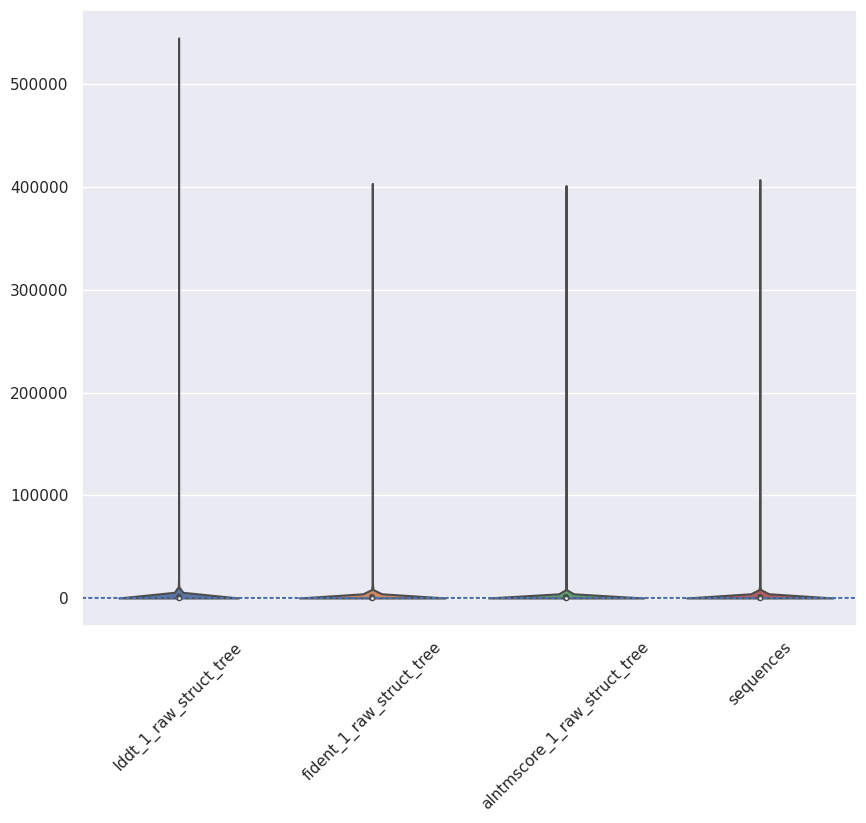

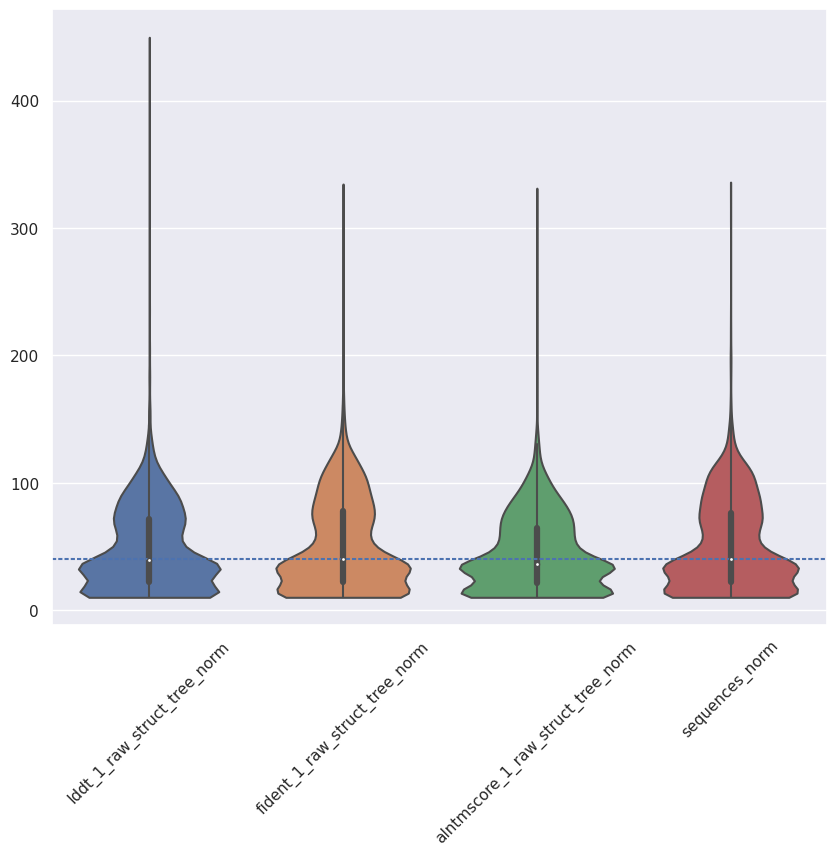

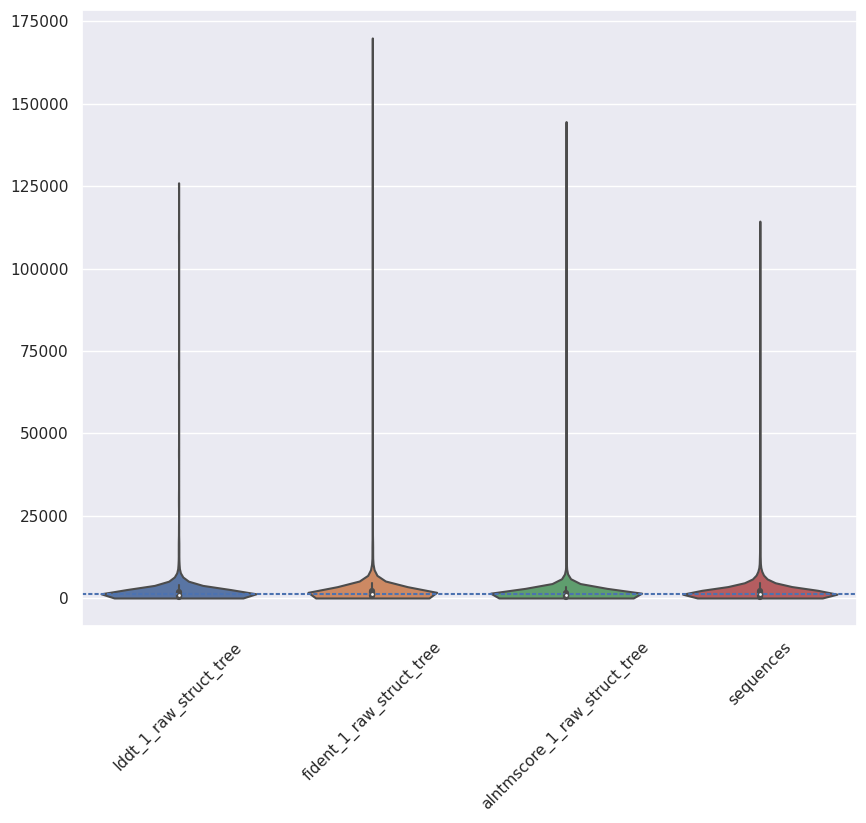

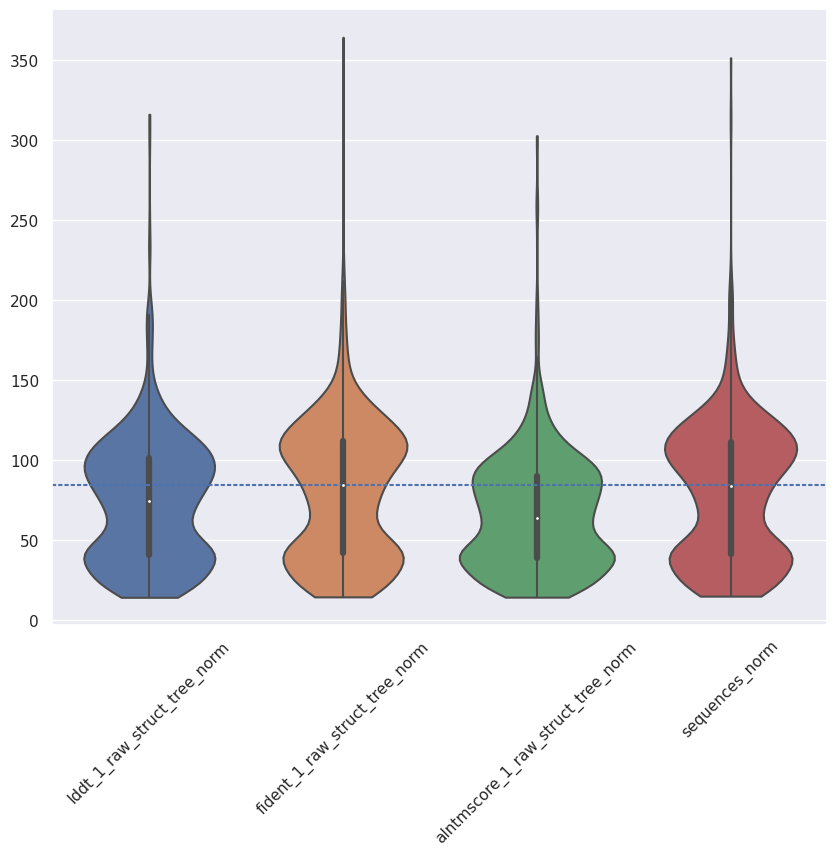

<Figure size 1000x800 with 0 Axes>

In [5]:
#todo iterate over hogs and cath and train a model
cladefolders = set(glob.glob( '../OMA_data/*/' ))-set([ '../OMA_data/logs/' ])
cladefolders = cladefolders.union( set(glob.glob( '../OMA_data_unfiltered/OMA_data/*/' )) - set([ '../OMA_data_unfiltered/OMA_data/logs/' ]) )
OMADF = compile_results(cladefolders , scorefunc = 'root_score' )

In [9]:
import seaborn as sns
filtereddf  = OMADF[OMADF.filtered == True]
unfiltereddf  = OMADF[OMADF.filtered == False]

In [10]:
print(len(filtereddf) , len(unfiltereddf))

1268 3691


In [28]:
def ret_winner(r, score1 , score2):
    if r[score1] < r[score2]:
        return 'True'
    if r[score1] > r[score2]:
        return 'False'
    if r[score1] == r[score2]:
        return 'Equal'
    
def retgraph(s1,s2 , filtereddf , xlabel , ylabel, title):
    sns.set_style("whitegrid")
    palette = { 'True' : 'blue'  , 'False' : 'red' , 'Equal' : 'green'}
    markers= {'markers' : {  'True' : 'o'  , 'False' : 'x' , 'Equal' : 'D'}}
    
    print(s1, s2, np.sum(filtereddf[s1] - filtereddf[s2]))
    
    filtereddf['structure better'] = filtereddf.apply( ret_winner , args = ( s1,  s2) , axis = 1)
    # Count the occurrences of each item
    category_counts = dict(filtereddf['structure better'].value_counts())
    ax = sns.scatterplot( data =filtereddf ,  x=s1 , y=s2 
    , hue = 'structure better'  , alpha = .25 , palette=palette  , s=10 )
    
    
    handles, labels = ax.get_legend_handles_labels()
    print(handles,labels)
    for i, label in enumerate(labels):
        count = category_counts[label]
        labels[i] = f"{label} ({count})"
    ax.legend(handles=handles, labels=labels)
    # Update the legend labels with the count information
    #ax.legend(loc='upper left')
    
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    plt.plot([0,370] ,[0,370]  , alpha = .25)
    ax.set_ylim(1, 370)
    ax.set_xlim(1, 370)
    plt.show()
    print(np.sum(filtereddf.fident_1_raw_struct_tree_norm - filtereddf.sequences_norm ))
    print(np.sum(filtereddf.fident_1_raw_struct_tree - filtereddf.sequences ))
    plt.savefig('../figures/'+title.replace(' ', '_')+'.svg')
    

sequences_norm fident_1_raw_struct_tree_norm -1491.4369386934177
[<matplotlib.collections.PathCollection object at 0x7f34a8fa94b0>, <matplotlib.collections.PathCollection object at 0x7f34a8fa9ff0>, <matplotlib.collections.PathCollection object at 0x7f34a8324790>] ['True', 'False', 'Equal']


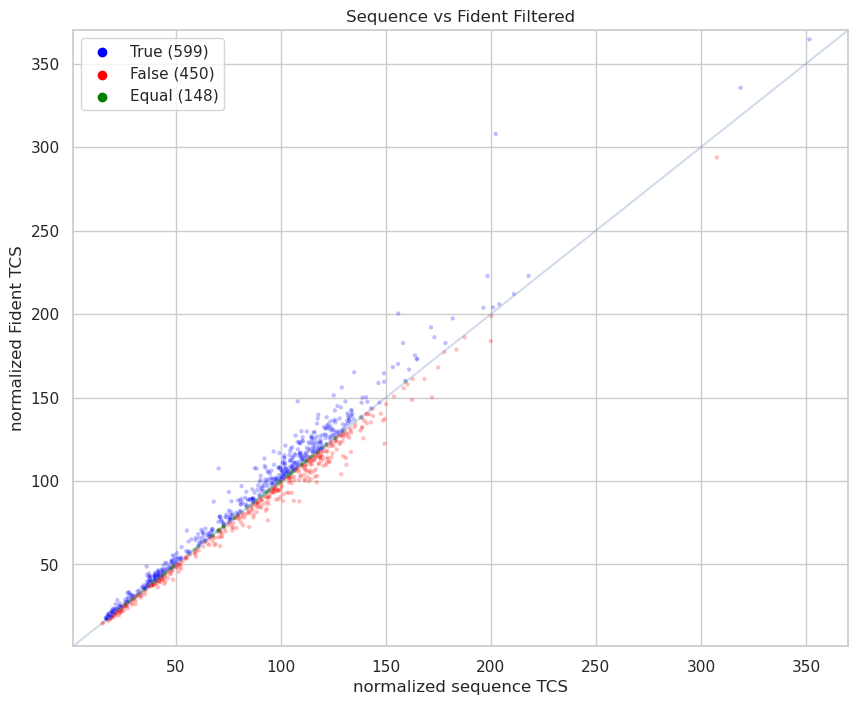

1491.4369386934177
94660.0


<Figure size 1000x800 with 0 Axes>

In [29]:
retgraph(  'sequences_norm' , 'fident_1_raw_struct_tree_norm' , filtereddf 
         ,'normalized sequence TCS' ,  'normalized Fident TCS',  'Sequence vs Fident Filtered')

sequences_norm lddt_1_raw_struct_tree_norm 6183.139024284226
[<matplotlib.collections.PathCollection object at 0x7f34a9515390>, <matplotlib.collections.PathCollection object at 0x7f34a950b040>, <matplotlib.collections.PathCollection object at 0x7f34a9517e80>] ['True', 'False', 'Equal']


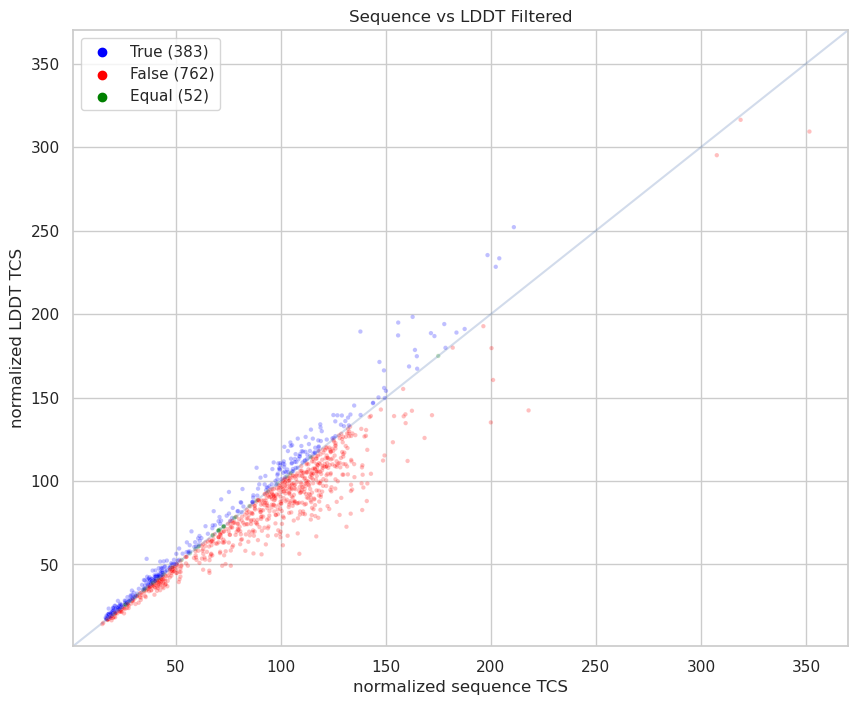

1491.4369386934177
94660.0


<Figure size 1000x800 with 0 Axes>

In [30]:

retgraph(  'sequences_norm' , 'lddt_1_raw_struct_tree_norm' , filtereddf 
         ,'normalized sequence TCS' ,  'normalized LDDT TCS',  'Sequence vs LDDT Filtered')


sequences_norm alntmscore_1_raw_struct_tree_norm 15363.620063527585
[<matplotlib.collections.PathCollection object at 0x7f34a98c8df0>, <matplotlib.collections.PathCollection object at 0x7f34a988ee00>, <matplotlib.collections.PathCollection object at 0x7f34a988f790>] ['False', 'True', 'Equal']


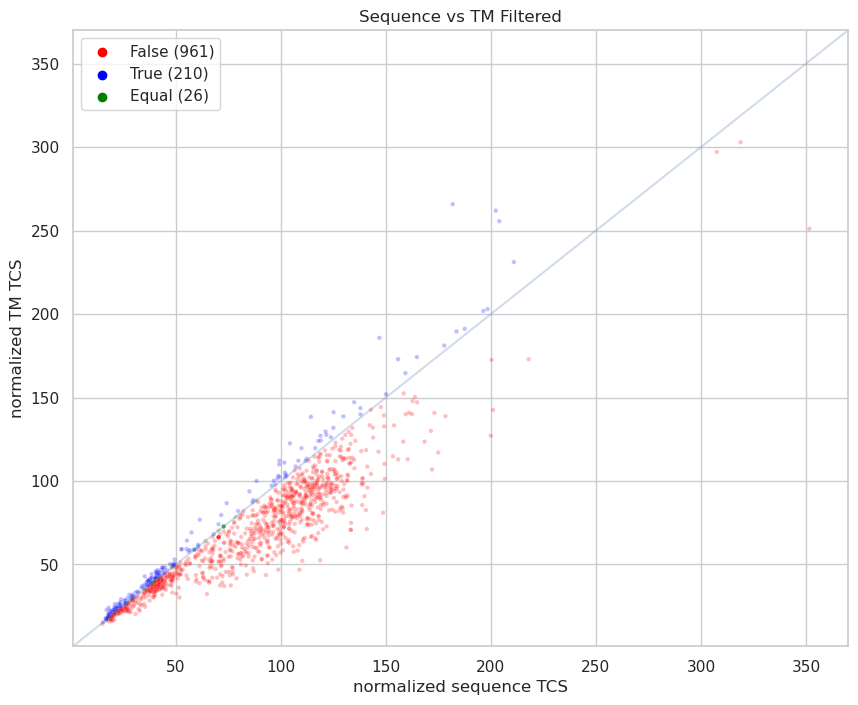

1491.4369386934177
94660.0


<Figure size 1000x800 with 0 Axes>

In [31]:

retgraph(  'sequences_norm' , 'alntmscore_1_raw_struct_tree_norm' , filtereddf 
         ,'normalized sequence TCS' ,  'normalized TM TCS',  'Sequence vs TM Filtered')


sequences_norm fident_1_raw_struct_tree_norm -1924.8987831647182
[<matplotlib.collections.PathCollection object at 0x7f34a9065120>, <matplotlib.collections.PathCollection object at 0x7f34a90657e0>, <matplotlib.collections.PathCollection object at 0x7f34a9067ee0>] ['Equal', 'False', 'True']


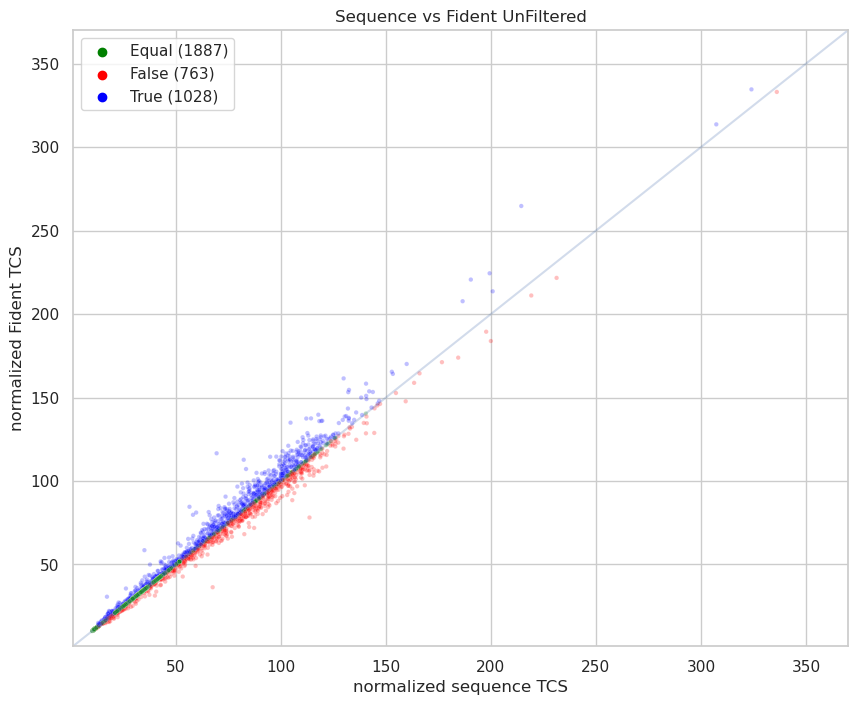

1924.8987831647182
64925.0


<Figure size 1000x800 with 0 Axes>

In [33]:


retgraph(  'sequences_norm' , 'fident_1_raw_struct_tree_norm' , unfiltereddf 
         ,'normalized sequence TCS' ,  'normalized Fident TCS',  'Sequence vs Fident UnFiltered')



sequences_norm lddt_1_raw_struct_tree_norm 9182.77393642494
[<matplotlib.collections.PathCollection object at 0x7f34a9533e20>, <matplotlib.collections.PathCollection object at 0x7f34a9530d90>, <matplotlib.collections.PathCollection object at 0x7f34a9530550>] ['Equal', 'False', 'True']


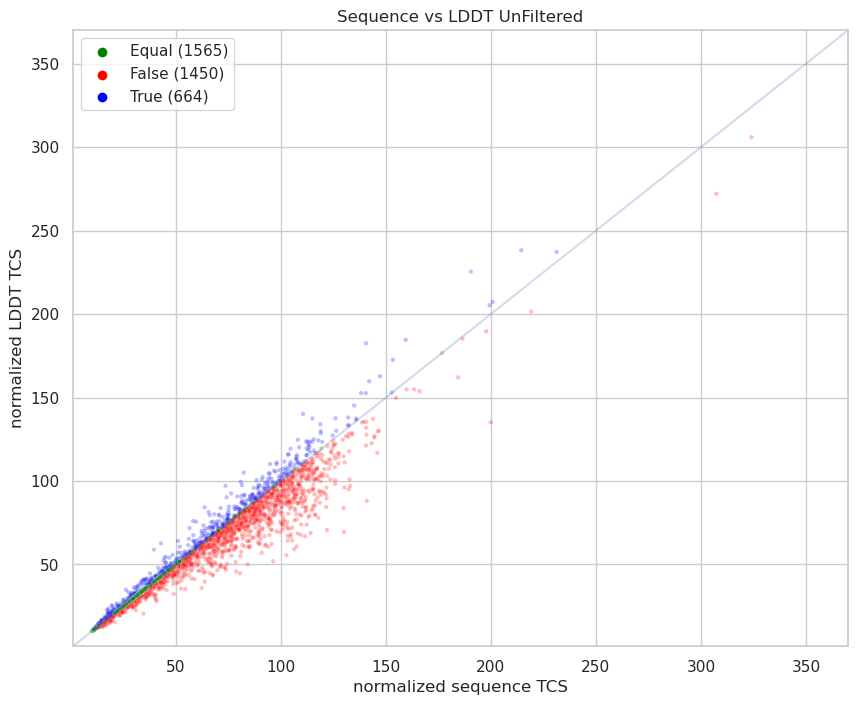

1924.8987831647182
64925.0


<Figure size 1000x800 with 0 Axes>

In [34]:


retgraph(  'sequences_norm' , 'lddt_1_raw_struct_tree_norm' , unfiltereddf 
         ,'normalized sequence TCS' ,  'normalized LDDT TCS',  'Sequence vs LDDT UnFiltered')


sequences_norm alntmscore_1_raw_struct_tree_norm 21627.686214482386
[<matplotlib.collections.PathCollection object at 0x7f34a97b4490>, <matplotlib.collections.PathCollection object at 0x7f34a97b48e0>, <matplotlib.collections.PathCollection object at 0x7f34a97b4d30>] ['Equal', 'False', 'True']


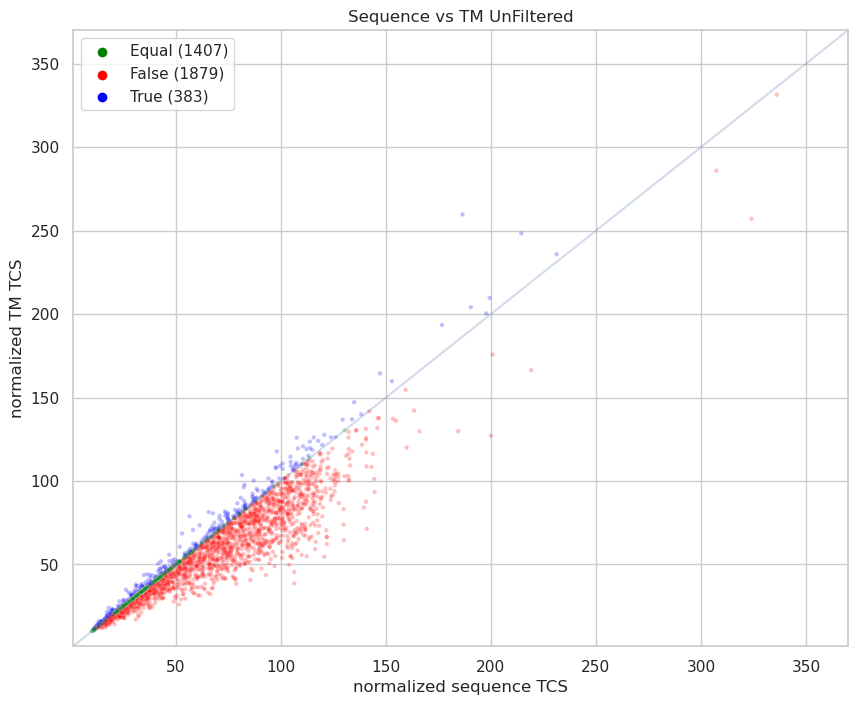

1924.8987831647182
64925.0


<Figure size 1000x800 with 0 Axes>

In [35]:
retgraph(  'sequences_norm' , 'alntmscore_1_raw_struct_tree_norm' , unfiltereddf 
         ,'normalized sequence TCS' ,  'normalized TM TCS',  'Sequence vs TM UnFiltered')


In [39]:
#characterise the ultrametricity of the tree
#todo iterate over hogs and cath and train a model
from compile_treeset import compile_folder_treestats
cladefolders = set(glob.glob( '../OMA_data/*/' ))-set([ '../OMA_data/logs/' ])
cladefolders = cladefolders.union( set(glob.glob( '../OMA_data_unfiltered/OMA_data/*/' )) - set([ '../OMA_data_unfiltered/OMA_data/logs/' ]) )
dfs = []
for folder in cladefolders:
    print(folder)
    OMA_treestat_DF = compile_folder_treestats( folder, verbose = False  )
    dfs.append(OMA_treestat_DF)
    

../OMA_data_unfiltered/OMA_data/Fungi/
../OMA_data_unfiltered/OMA_data/Fungi/
117


processed: 117:  99%|█████████▉| 116/117 [00:04<00:00, 23.61it/s]


../OMA_data_unfiltered/OMA_data/Bilateria/
../OMA_data_unfiltered/OMA_data/Bilateria/
117


processed: 117: 100%|██████████| 117/117 [00:08<00:00, 13.35it/s]


../OMA_data_unfiltered/OMA_data/Eukaryota/
../OMA_data_unfiltered/OMA_data/Eukaryota/
117


processed: 117:  97%|█████████▋| 114/117 [00:06<00:00, 17.82it/s]


../OMA_data/Bacteria/
../OMA_data/Bacteria/
633


processed: 633:  99%|█████████▉| 626/633 [01:29<00:00,  7.01it/s]


../OMA_data/Euteleostomi/
../OMA_data/Euteleostomi/
1019


processed: 1019:  38%|███▊      | 391/1019 [01:12<01:56,  5.41it/s]


../OMA_data/Tetrapoda/
../OMA_data/Tetrapoda/
359


processed: 359:  46%|████▌     | 166/359 [00:20<00:24,  8.01it/s]


../OMA_data_unfiltered/OMA_data/Chordata/
../OMA_data_unfiltered/OMA_data/Chordata/
117


processed: 117:  96%|█████████▌| 112/117 [00:14<00:00,  7.56it/s]


../OMA_data/Fungi/
../OMA_data/Fungi/
138


processed: 137:  45%|████▍     | 62/138 [00:09<00:11,  6.68it/s]


../OMA_data/Eumetazoa/
../OMA_data/Eumetazoa/
896


processed: 896:  65%|██████▍   | 582/896 [01:15<00:40,  7.73it/s]


../OMA_data_unfiltered/OMA_data/Tetrapoda/
../OMA_data_unfiltered/OMA_data/Tetrapoda/
117


processed: 117:  99%|█████████▉| 116/117 [00:04<00:00, 24.72it/s]


../OMA_data_unfiltered/OMA_data/Bacteria/
../OMA_data_unfiltered/OMA_data/Bacteria/
117


processed: 117: 100%|██████████| 117/117 [00:15<00:00,  7.49it/s]


../OMA_data/Opisthokonta/
../OMA_data/Opisthokonta/
523


processed: 523:  66%|██████▋   | 347/523 [00:53<00:27,  6.48it/s]


../OMA_data_unfiltered/OMA_data/Eumetazoa/
../OMA_data_unfiltered/OMA_data/Eumetazoa/
117


processed: 117: 100%|██████████| 117/117 [00:13<00:00,  8.79it/s]


../OMA_data_unfiltered/OMA_data/Opisthokonta/
../OMA_data_unfiltered/OMA_data/Opisthokonta/
117


processed: 117:  97%|█████████▋| 113/117 [00:03<00:00, 28.44it/s]


../OMA_data/Eukaryota/
../OMA_data/Eukaryota/
605


processed: 603:  76%|███████▋  | 462/605 [01:00<00:18,  7.66it/s]


../OMA_data_unfiltered/OMA_data/Euteleostomi/
../OMA_data_unfiltered/OMA_data/Euteleostomi/
117


processed: 117:  97%|█████████▋| 113/117 [00:09<00:00, 12.46it/s]


../OMA_data_unfiltered/OMA_data/Dikarya/
../OMA_data_unfiltered/OMA_data/Dikarya/
117


processed: 117:  99%|█████████▉| 116/117 [00:14<00:00,  8.25it/s]


../OMA_data/Dikarya/
../OMA_data/Dikarya/
186


processed: 185:  52%|█████▏    | 96/186 [00:05<00:05, 17.55it/s]


../OMA_data_unfiltered/OMA_data/LUCA/
../OMA_data_unfiltered/OMA_data/LUCA/
117


processed: 117: 100%|██████████| 117/117 [00:09<00:00, 12.78it/s]


../OMA_data/Bilateria/
../OMA_data/Bilateria/
558


processed: 558:  45%|████▌     | 252/558 [00:18<00:22, 13.73it/s]


../OMA_data/LUCA/
../OMA_data/LUCA/
880


processed: 880:  97%|█████████▋| 853/880 [00:45<00:01, 18.62it/s]


../OMA_data/Chordata/
../OMA_data/Chordata/
786


processed: 786:  50%|█████     | 393/786 [00:23<00:23, 16.99it/s]


In [40]:
import pandas as pd
OMA_treestats = pd.concat(dfs)
print(OMA_treestats)

                                               nseqs  \
../OMA_data_unfiltered/OMA_data/Fungi/HOG0/       12   
../OMA_data_unfiltered/OMA_data/Fungi/HOG1/       15   
../OMA_data_unfiltered/OMA_data/Fungi/HOG10/      13   
../OMA_data_unfiltered/OMA_data/Fungi/HOG100/     13   
../OMA_data_unfiltered/OMA_data/Fungi/HOG101/     13   
...                                              ...   
../OMA_data/Chordata/HOG105/                       3   
../OMA_data/Chordata/HOG254/                      15   
../OMA_data/Chordata/HOG858/                       5   
../OMA_data/Chordata/HOG202/                       3   
../OMA_data/Chordata/HOG816/                       3   

                                                                    alntmscore_0_raw_struct_tree  \
../OMA_data_unfiltered/OMA_data/Fungi/HOG0/                                                  NaN   
../OMA_data_unfiltered/OMA_data/Fungi/HOG1/                                                  NaN   
../OMA_data_unfiltered/OMA_

In [64]:
treestats_df = OMA_treestats.dropna()
print(len(treestats_df))

1235


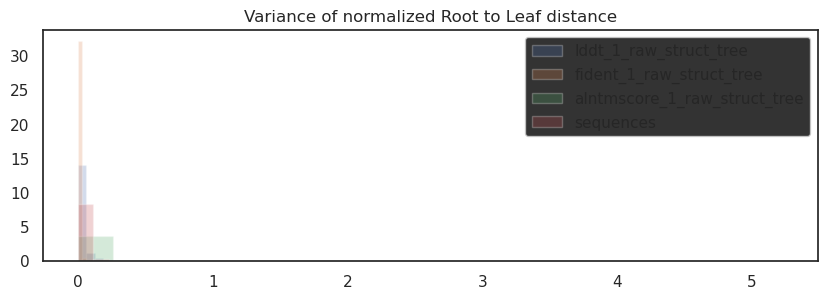

In [65]:
metrics = 'nobsint,minmax,mean,variance,skewness,kurtosis'

import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
cols = []
for c in treestats_df.columns:
    if 'nseqs' not in c and 'var' not in c and '0' not in c and 'exp' not in c:
        treestats_df[c+'var'] = treestats_df[c].map( lambda x : x[3] )
        cols.append(c+'var')
        plt.hist( treestats_df[c+'var'] , alpha = .25 , label = c, density = True , bins = 20)
plt.title( 'Variance of normalized Root to Leaf distance')
plt.legend()
plt.show()

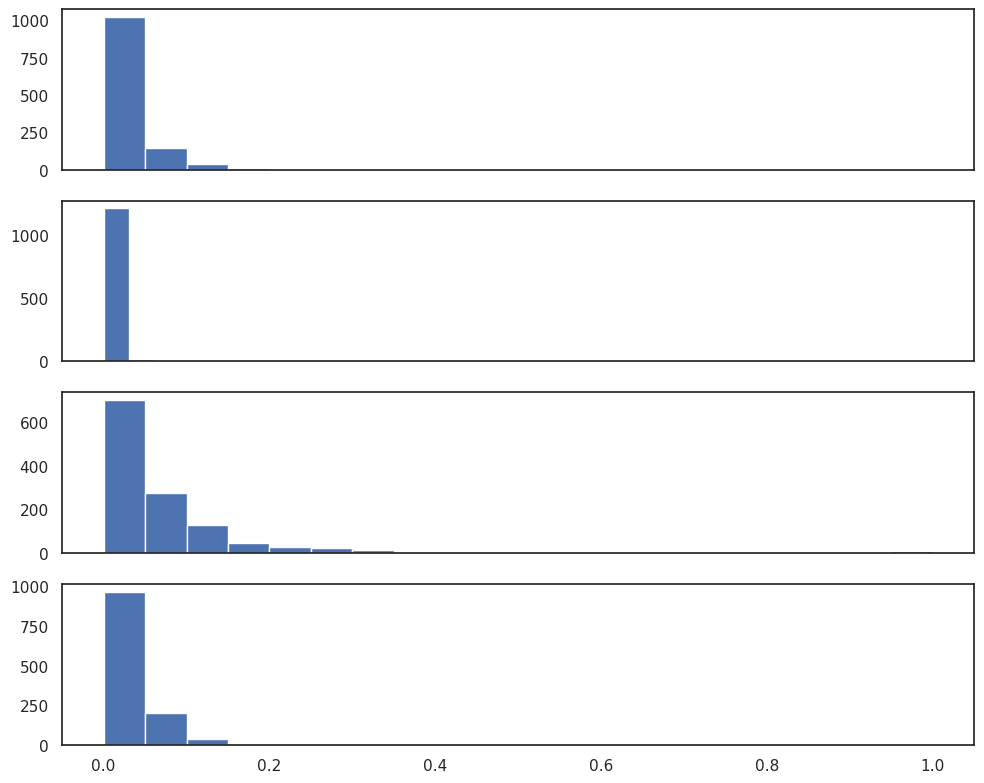

In [112]:
N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots(4, 1, sharex=True, tight_layout=True)
df = treestats_df[cols]

for i,col in enumerate(cols):
    # We can set the number of bins with the `bins` kwarg
    data = df[col] 
    data[data>1]= 1
    axs[i].hist( df[col] , bins=n_bins)
    axs[i].set_title(col)
plt.show()

In [75]:
df = treestats_df[cols].T
data = []
labels = []

for col in df.columns:
    data.append(np.array(df[col]))
    labels.append(df[col].index)
data = np.vstack(data).ravel()
labels = np.vstack(labels).ravel()

print(data)
print(labels)

[0.01977268 0.00074986 0.08901763 ... 0.00297346 0.11803059 0.00344425]
['lddt_1_raw_struct_treevar' 'fident_1_raw_struct_treevar'
 'alntmscore_1_raw_struct_treevar' ... 'fident_1_raw_struct_treevar'
 'alntmscore_1_raw_struct_treevar' 'sequencesvar']


In [100]:
data[data>.25] = .25

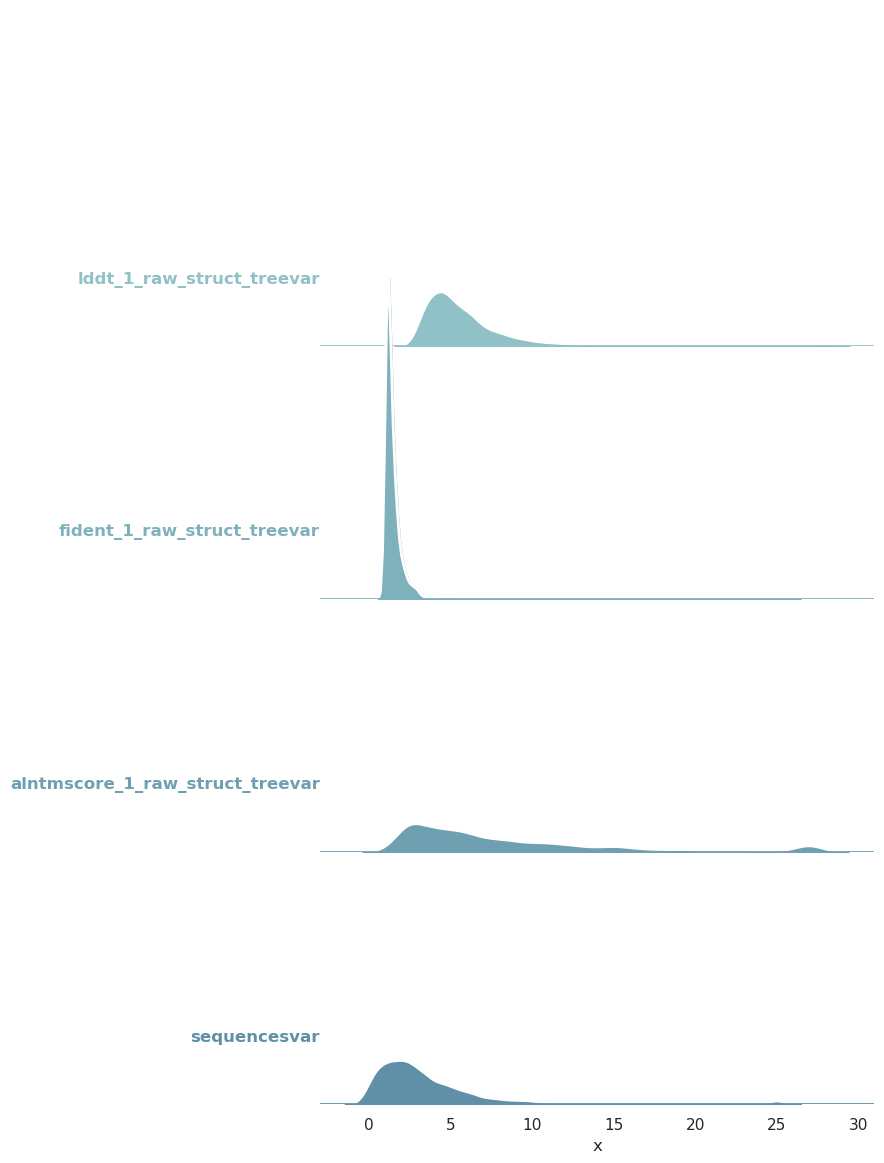

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)

df = pd.DataFrame(dict(x=data*100, g=labels))


mapper = { l:i for i,l in enumerate(set(labels) )}
m = df.g.map(mapper)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=3, height=3, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=True,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=True, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=True)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="right", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [ ]:

#define the colormap 
my_cmap = plt.cm.inferno

#define the yticks, i.e., the column numbers
yticks = np.arange(ncol)

#we create evenly spaced bins between the minimum and maximum of the entire dataframe
xbins = np.linspace(df.min().min(), df.max().max(), 100)
#and calculate the center and widths of the bars
xcenter = np.convolve(xbins, np.ones(2), "valid")/2
xwidth = np.diff(xbins)

#calculate now the histogram and plot it for each column
for i, ytick in enumerate(yticks):

    #extract the current column from your df by its number
    col =  df.iloc[:, ytick]

    #determine the histogram values, here you have to adapt it to your needs
    histvals, _ = np.histogram(col, bins=xbins)

    #plot the histogram as a bar for each bin
    #now with continuous color mapping and edgecolor, but thinner lines, so we can better see all bars
    ax.bar(left=xcenter, height=histvals, width=xwidth, zs=ytick, zdir="y", color=my_cmap(i/ncol), alpha=0.666, edgecolor="grey", linewidth=0.3)

ax.set_xlabel("bin")
ax.set_ylabel("column")
ax.set_zlabel("value")

#label every other column number
ax.set_yticks(yticks[::2])
ax.set_zlim3d(0,60)
plt.show()



In [110]:
#plt the OMA clades w and without filtering 
#plot the cat and cath and total oma with and without filtering


In [111]:
#construct structure and sequence feature dataset
import tqdm

def ret_description(vec , label = ''):
    return { label+'_mean': np.mean(vec) , label+'_max': np.amax(vec) , label+'_min': np.amin(vec) ,label+'_var': np.var(vec) }

cladefolders = set(glob.glob( '../OMA_data/*/' ))-set([ '../OMA_data/logs/' ])
cladefolders = cladefolders.union( set(glob.glob( '../OMA_data_unfiltered/OMA_data/*/' )) - set([ '../OMA_data_unfiltered/OMA_data/logs/' ]) )
allfolders = cladefolders

dfs = []
print(allfolders)
for clade in allfolders:
    print(clade)
    res = {}
    folders = glob.glob(clade + '*/' )
    for folder in tqdm.tqdm_notebook(folders):
        if 'logs' not in folder:
            
            nstructs = len(glob.glob(folder+'structs/*.pdb'))
            try:
                with open(folder + 'sequences.fst') as fstin:
                    nseqs = fstin.read().count('>')
            except:
                nseqs = 0
            if nstructs == nseqs:
                if os.path.isfile(folder + 'plddt.json' ):
                    plddt_df = pd.read_json(folder + 'plddt.json').T
                    if len(plddt_df)>0:
                        plddt_df.columns = 'nobs,minmax,mean,variance,skewness,kurtosis'.split(',')
                        plddt_df['min'] = plddt_df.minmax.map( lambda r: r[0] )
                        plddt_df['max'] = plddt_df.minmax.map( lambda r: r[1] )
                        res[folder] = {}
                        for col in ['nobs', 'min' , 'max' , 'mean' , 'variance' , 'skewness' , 'kurtosis' ]:
                            descriptors = ret_description(plddt_df[col] , label = col)
                            for l in descriptors:
                                res[folder][l] = descriptors[l]
                        #add in some descriptors of the taxonomic spread and sequence set
                        seqdf = pd.read_csv(folder+'sequence_dataset.csv' )
                        res[folder]['nprots'] = len(seqdf)
                        cladesets = [ set(l.split(',')) for l in  seqdf['Taxonomic lineage (Ids)'] ]
                        union_all = cladesets[0]
                        intersection_all = cladesets[0]
                        for c in cladesets:
                            union_all = union_all.union(c)
                            intersection_all.intersection(c)
                        res[folder]['n_clades'] = len(union_all)
                        res[folder]['inter_clades'] = len(intersection_all)
                        res[folder]['inter/nc'] =  res[folder]['inter_clades'] /  res[folder]['n_clades'] 
                        res[folder]['nc/np'] = res[folder]['nprots'] / res[folder]['n_clades']
        
    resdf = pd.DataFrame.from_dict(res, orient = 'index')
    dfs.append(resdf)
seqset_resdf = pd.concat(dfs)



{'../OMA_data_unfiltered/OMA_data/Dikarya/', '../OMA_data_unfiltered/OMA_data/Bilateria/', '../OMA_data/Dikarya/', '../OMA_data_unfiltered/OMA_data/Eukaryota/', '../OMA_data_unfiltered/OMA_data/Opisthokonta/', '../OMA_data/Eukaryota/', '../OMA_data_unfiltered/OMA_data/Chordata/', '../OMA_data_unfiltered/OMA_data/Fungi/', '../OMA_data/Bacteria/', '../OMA_data/Fungi/', '../OMA_data_unfiltered/OMA_data/Tetrapoda/', '../OMA_data_unfiltered/OMA_data/Eumetazoa/', '../OMA_data/Euteleostomi/', '../OMA_data/LUCA/', '../OMA_data/Bilateria/', '../OMA_data/Opisthokonta/', '../OMA_data_unfiltered/OMA_data/Euteleostomi/', '../OMA_data_unfiltered/OMA_data/LUCA/', '../OMA_data/Eumetazoa/', '../OMA_data/Tetrapoda/', '../OMA_data_unfiltered/OMA_data/Bacteria/', '../OMA_data/Chordata/'}
../OMA_data_unfiltered/OMA_data/Dikarya/


/tmp/29577685/ipykernel_1345968/1136481107.py:17: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/118 [00:00<?, ?it/s]

../OMA_data_unfiltered/OMA_data/Bilateria/


  0%|          | 0/118 [00:00<?, ?it/s]

../OMA_data/Dikarya/


  0%|          | 0/187 [00:00<?, ?it/s]

../OMA_data_unfiltered/OMA_data/Eukaryota/


  0%|          | 0/118 [00:00<?, ?it/s]

../OMA_data_unfiltered/OMA_data/Opisthokonta/


  0%|          | 0/118 [00:00<?, ?it/s]

../OMA_data/Eukaryota/


  0%|          | 0/606 [00:00<?, ?it/s]

../OMA_data_unfiltered/OMA_data/Chordata/


  0%|          | 0/118 [00:00<?, ?it/s]

../OMA_data_unfiltered/OMA_data/Fungi/


  0%|          | 0/118 [00:00<?, ?it/s]

../OMA_data/Bacteria/


  0%|          | 0/634 [00:00<?, ?it/s]

../OMA_data/Fungi/


  0%|          | 0/139 [00:00<?, ?it/s]

../OMA_data_unfiltered/OMA_data/Tetrapoda/


  0%|          | 0/118 [00:00<?, ?it/s]

../OMA_data_unfiltered/OMA_data/Eumetazoa/


  0%|          | 0/118 [00:00<?, ?it/s]

../OMA_data/Euteleostomi/


  0%|          | 0/1020 [00:00<?, ?it/s]

../OMA_data/LUCA/


  0%|          | 0/881 [00:00<?, ?it/s]

../OMA_data/Bilateria/


  0%|          | 0/559 [00:00<?, ?it/s]

../OMA_data/Opisthokonta/


  0%|          | 0/524 [00:00<?, ?it/s]

../OMA_data_unfiltered/OMA_data/Euteleostomi/


  0%|          | 0/118 [00:00<?, ?it/s]

../OMA_data_unfiltered/OMA_data/LUCA/


  0%|          | 0/118 [00:00<?, ?it/s]

../OMA_data/Eumetazoa/


  0%|          | 0/897 [00:00<?, ?it/s]

../OMA_data/Tetrapoda/


  0%|          | 0/360 [00:00<?, ?it/s]

../OMA_data_unfiltered/OMA_data/Bacteria/


  0%|          | 0/118 [00:00<?, ?it/s]

../OMA_data/Chordata/


  0%|          | 0/787 [00:00<?, ?it/s]

In [112]:
print(seqset_resdf)
seqset_resdf.to_csv('structure_and_sequence_qcmetrics.csv')

                                 nobs_mean  nobs_max  nobs_min      nobs_var  \
../OMA_data/Bacteria/HOG33/     818.222222       985       642  11731.061728   
../OMA_data/Bacteria/HOG59/     499.307692       533       447    473.443787   
../OMA_data/Bacteria/HOG123/    399.333333       516       277   1311.984127   
../OMA_data/Bacteria/HOG185/     64.357143        71        56     29.086735   
../OMA_data/Bacteria/HOG20/     203.357143       214       191     51.372449   
...                                    ...       ...       ...           ...   
../OMA_data/Bilateria/HOG853/   459.000000       459       459      0.000000   
../OMA_data/Bilateria/HOG191/   203.500000       249       173    838.750000   
../OMA_data/Bilateria/HOG246/   253.772727       309       199    956.539256   
../OMA_data/Bilateria/HOG646/   147.962025       178       129     56.163115   
../OMA_data/Bilateria/HOG1023/  115.666667       171        92    425.777778   

                                 min_me

In [113]:
#add to the tree comparison data
tree_resdf = unfiltereddf.merge( seqset_resdf , left_index = True, right_index = True, how = 'inner' )
print(tree_resdf)

                              alntmscore_0_raw_struct_tree  \
../OMA_data/Bacteria/HOG150/                         116.0   
../OMA_data/Bacteria/HOG487/                         346.0   
../OMA_data/Bacteria/HOG361/                         777.0   
../OMA_data/Bacteria/HOG375/                         344.0   
../OMA_data/Bacteria/HOG666/                         191.0   
...                                                    ...   
../OMA_data/Bacteria/HOG440/                         113.0   
../OMA_data/Bacteria/HOG409/                         223.0   
../OMA_data/Bacteria/HOG338/                         265.0   
../OMA_data/Bacteria/HOG44/                          561.0   
../OMA_data/Bacteria/HOG342/                         424.0   

                              alntmscore_0_exp_struct_tree  \
../OMA_data/Bacteria/HOG150/                         116.0   
../OMA_data/Bacteria/HOG487/                         336.0   
../OMA_data/Bacteria/HOG361/                         799.0   
../OMA_

In [114]:
print(tree_resdf.columns)

Index(['alntmscore_0_raw_struct_tree', 'alntmscore_0_exp_struct_tree',
       'alntmscore_1_exp_struct_tree', 'fident_0_raw_struct_tree',
       'lddt_0_exp_struct_tree', 'lddt_1_exp_struct_tree',
       'fident_0_exp_struct_tree', 'lddt_1_raw_struct_tree',
       'fident_1_raw_struct_tree', 'fident_1_exp_struct_tree',
       ...
       'skewness_var', 'kurtosis_mean', 'kurtosis_max', 'kurtosis_min',
       'kurtosis_var', 'nprots', 'n_clades', 'inter_clades', 'inter/nc',
       'nc/np'],
      dtype='object', length=341)


In [115]:
#try to predict the delta using these features w gradient boosted trees
#try to predict the RF distance as well

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [116]:
#'nc/np'

feature_names = ['nobs_mean', 'nobs_max',
       'nobs_min', 'nobs_var', 'min_mean', 'min_max', 'min_min', 'min_var',
       'max_mean', 'max_max', 'max_min', 'max_var', 'mean_mean', 'mean_max',
       'mean_min', 'mean_var', 'variance_mean', 'variance_max', 'variance_min',
       'variance_var', 'skewness_mean', 'skewness_max', 'skewness_min',
       'skewness_var', 'kurtosis_mean', 'kurtosis_max', 'kurtosis_min',
       'kurtosis_var', 'nprots', 'n_clades', 'inter_clades', 'inter/nc','nc/np'
       ]
X, y = tree_resdf[feature_names], tree_resdf.fident_1_raw_struct_tree_norm - tree_resdf.sequences_norm

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)


params = {
    "n_estimators": 200,
    "max_depth": 5,
    "min_samples_split": 10,
    "learning_rate": 0.01,
    "loss": "squared_error",
}


reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

The mean squared error (MSE) on test set: 1.2840


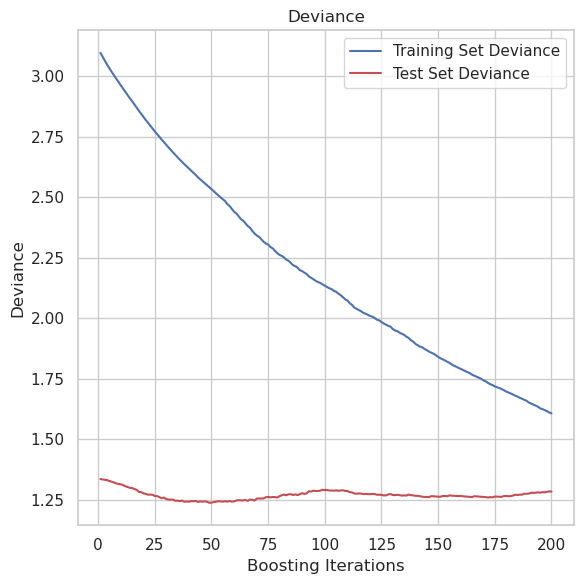

In [117]:
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

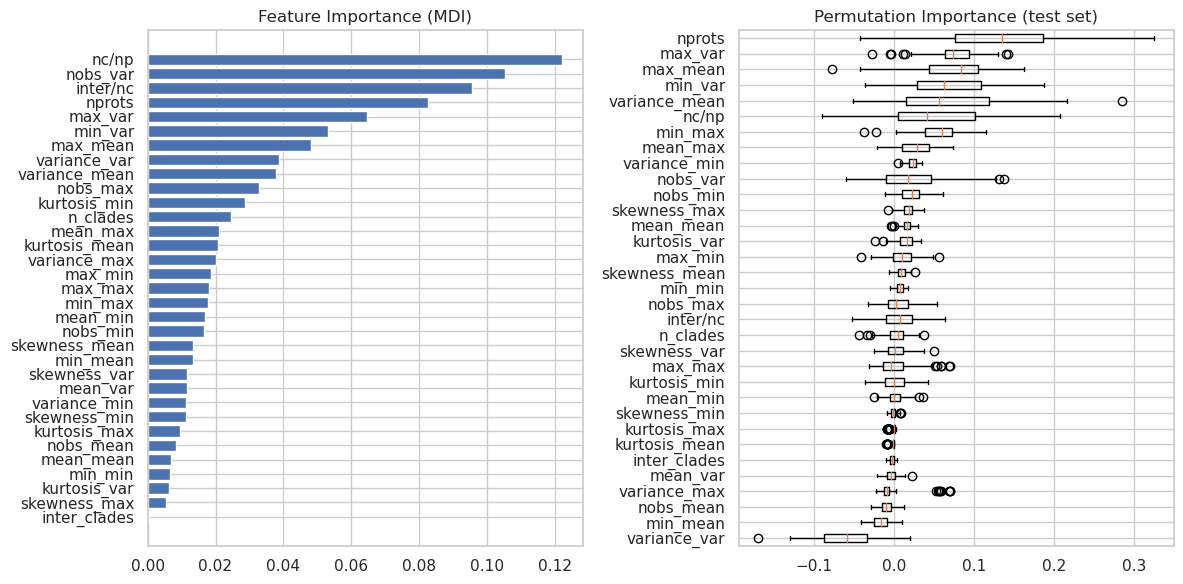

In [98]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=100, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

